In [2]:
import numpy as np

import matplotlib.pyplot as plt
from scipy import linalg

plt.rcParams.update({'font.size': 18})
plt.rcParams['lines.linewidth'] = 3

pi=np.pi

# Laboratory 4 - Background and Resources

## What is the Finite Element Method?

Many engineering problems present themselves as partial differential equations (PDEs). The fields of solid mechanics, electromagnetics, fluid mechanics, and heat transfer often describe a spatially varying quantity using PDEs - imagine, for example, the strain or temperature distribution across an engine component. For simple geometries, these types of "boundary value problems" can be solved analytically. For complicated geometries, analytical solutions are at best prohibitively time consuming and at worst impossible. In such cases, Finite Element Analysis (FEA) is the standard solution method.

The Finite Element Method (FEM) involves taking a continuous representation of a physical system and breaking it up into a finite number of elements. In three dimensions, these elements would commonly be shapes like cubes (hexahedrons) or pyramids (tetrahedrons). They are connected to their neighbors via "nodes" at each corner. This method results in a set of simultaneous algebraic equations that, when solved together, satisfies the governing equations (e.g., displacement or stress) at every node. With an increasing number of elements (i.e., decreasing element size), the solution found using FEA will approach the analytical solution.

As a simple example, consider a rectangular beam with a force applied to stretch it axially, as seen in Figure 1. This beam is representative of a simple, 1-DOF element with a "node" at each end. Hooke's law relates the applied force to strain and deflection: 

$F = AE\epsilon = AE\frac{\delta}{l}=k\delta$     (1)

where $k$ is the stiffness (force/displacement) of the element, $E$ is the Young's modulus of the element, $\epsilon$ is the strain in the element, $\delta$ is the change in length of the element, and $l$ is the original length of the element. Considering the displacement of each node, $u_{i}$, the force on this element is:

$\left[\begin{array}{c} F_{1} \\ F_{2}\end{array}\right] =
\left[\begin{array}{c c} k & -k\\ -k & k\end{array}\right]
\left[\begin{array}{c} u_{1} \\ u_{2}\end{array}\right]$ (2)

where $F_1$ and $F_2$ are the forces on nodes 1 and 2, respectively, and $u_1$
and $u_2$ are the displacements of nodes 1 and 2, respectively. 

![Figure 1: Diagram of axial loads on a beam made of one finite element.](./figure_01.png)

*Figure 1: Diagram of axial loads on a beam made of one finite element.*

This can be generalized to three dimensions and $n$ nodes by relating the force vector $F$ to the displacement vector $u$ using the stiffness matrix $[K]$.

$[K]u = F$   (3)

and

$u = [K]^{-1}F$  (4)

where $u$ and $F$ are $n  x 1$ vectors and $[K]$ is an $n x n$ matrix.

In three dimensions, each node can move in three directions. $n$ is therefor three times the number of nodes [(1)](http://bcs.wiley.com/he-bcs/Books?action=index&bcsId=3625&itemId=0470035803). 

## Modal Analysis

Modal analysis is the process of analyzing the dynamic response of a system or structure in terms of its inherent dynamic characteristics - its natural frequencies and mode shapes. In the previous lab, you experimentally investigated the first three vibration modes of your cantilevered beam. 

As we saw in class, determining the vibration modes and frequencies of a system with a finite number of elements boils down to the solution of an eigenvalue problem. FEA lends itself well to the solution of such problems. In this lab, you will be using FEA to determine these frequencies and mode shapes.


### Two Degree of Freedom Modal Analysis Example

The solution for a modal analysis is found by solving for the eigenvalues and eigenvectors of the system [(3)](https://books.google.com/books/about/Engineering_Vibration.html?id=OCg-XwAACAAJ). The output is a number of eigenvalues, or natural frequencies, and their corresponding eigenvectors, or mode shapes. As a simple example, consider the lumped mass solution of two masses connected by three springs as seen in Fig. 2. 

![Figure 2: Two masses connected to 3 springs](./spring_mass.png)

*Figure 2: Two masses connected to 3 springs*

In the 2-mass system, we have 2 degrees of freedom, so there are 2 differential equations that describe the motion of masses:

$m_1 \ddot{x}_1 = -k_1x_1+k_2(x_2-x_1)$  (3a)

$m_2 \ddot{x}_2 = -k_3x_2-k_2(x_2-x_1)$  (3b)

where masses 1 and 2 have mass $m_1$ and $m_2$, respectively, and springs 1, 2, and 3 have stiffness $k_1$, $k_2$, and $k_3$, respectively. The differential equations relate acceleration of mass 1 and mass 2, $\ddot{x}_1$and $\ddot{x}_2$, to displacement, $x_1$ and $x_2$. The mass and stiffness matrices for this problem become:

$\left[\begin{array}{cc}
m_1 & 0 \\
0 & m_2 \end{array}\right]
\frac{d^2}{dt^2}\left[\begin{array}{c}
x_1 \\
x_2 \end{array}\right]=
-\left[\begin{array}{cc}
k_1+k_2 & -k_2 \\
-k_2 & k_2+k_3 \end{array}\right]
\left[\begin{array}{c}
x_1 \\
x_2 \end{array}\right]$  (4a)

or

$[M]\ddot{x}+[K]x=0$ (4b)

As we saw in class, assuming a harmonic solution of $x=ve^{i\omega t}$ (and differentiating it twice) allows us to write equation 4b in the form:

$[M]^{-1}[K]x=\omega^2x$  (5)

Equation 5 is an eigenvalue problem, with $\lambda = \omega^2$. The solution of this problem will reveal the natural frequencies and mode shapes of the system.

In the following example, the natural frequencies for $m_1=m_2$ = 0.2 kg and $k_1=k_2=k_3$ = 500 N/m are shown. 

In [6]:
#Define the system parameters
m1=m2=0.2 # 0.2 kg
k1=k2=k3=500 # 500 N/m

#build the matrices
M=np.array([[m1,0],[0,m2]])
K=np.array([[k1+k2,-k2],[-k2,k2+k3]])

#take the inverse and left-multiply
Minv=linalg.inv(M)
A=np.matmul(Minv, K)

#find the eigenvalues, e, and the eigenvectors, v
e,v=linalg.eig(A)

#take the square root to find frequency, convert to Hz
w1=np.sqrt(e[0].real)/2/pi
w2=np.sqrt(e[1].real)/2/pi

#"normalize" the vectors (not a true normalization - here the magnitudes of their elements equal one, not the overall magnitude)
v1=v[:,0]/max(v[:,0])
v2=v[:,1]/max(v[:,1])

print('1st natural frequency is %1.0f Hz, \
     mode shape: %1.0f*x1(t)=%1.0f*x2(t)'%(w2,v2[0],v2[1]))
print('2nd natural frequency is %1.0f Hz, \
    mode shape: %1.0f*x1(t)=%1.0f*x2(t)'%(w1,v1[0],v1[1]))

1st natural frequency is 8 Hz,      mode shape: 1*x1(t)=1*x2(t)
2nd natural frequency is 14 Hz,     mode shape: 1*x1(t)=-1*x2(t)


![Figure 3: Vibration modes of 2-mass system when masses are 200 g and 3 springs have stiffness k=500 N/m](./eigenvalues.gif)

*Figure 3: Vibration modes of 2-mass system when masses are 200 g and the 3 springs have stiffness k=500 N/m. The first and second modes are animated on the left and right, respectively.*

The amplitudes of the displacements will be proportional to the initial
velocities. A **modal analysis** is concerned with the natural frequencies and
mode shapes. This example has two modes (because it has two degrees of freedom).
In mode one, the displacement of mass 1 is equal to mass 2  and $\omega_{1}=\sqrt{(k_1+k_2)/(m_1+m_2)}$. In mode two, the
displacement of mass 1 is equal and opposite to mass 2 and $\omega_{2}=\sqrt{2(k_1+k_2+k_3)/(m_1+m_2)}$. The natural frequencies
are 8 and 14 Hz, for mode 1 and 2, respectively.

## FEA modal analysis

In the FEA modal analysis, each element is composed of 8 nodes (for hexahedrals, i.e. cubes) that are shared by adjoining elements. This network of interconnected nodes is called a *mesh*. Each node can move in three dimensions, which means the total degrees of freedom of the system is $3\times$(number of nodes). The eigenvalue solution would reveal $3\times$(number of nodes) natural frequencies and vibration modes. 

We cannot use the higher frequency vibration mode results because they will not be accurate, but the lowest vibration modes will become more accurate as we increase the number of nodes in the system. 



### Vibration modes from FEA

In Lab 3, our strain gauge was mounted to the top surface of the beam, aligned with its long axis. The setup was perfect for capturing one type of vibration mode - displacement in the vertical axis (Figure 4).

![Figure 4: Vibration in the vertical axis.](./Vertical.png)

*Figure 4: Vibration in the vertical plane (Side View).*

A modal analysis will also reveal other types of vibration modes. There will be vibration in the horizontal plane (Figure 5), and at frequencies beyond our investigation there will also be torsional (twisting) modes.

![Figure 5: Vibration in the horizonal plane.](./Horizontal.png)

*Figure 5: Vibration in the horizontal plane (Top View).*

The first step in evaluating your data will be determining which of the modes discovered by FEA match the modes you discovered via FFT analysis of strain gauge data.

### Convergence

The FEA solution will approach the analytical solution as we increase the number of nodes. This is called "convergence". The ideal FEA solution will reproduce our analytical or experimental results, with the fewest nodes required to see convergence.

It is tempting to simply set the number of nodes extremely high to ensure immediate convergence. For a simple model, this is unlikely to be detrimental. For complicated models, this can result in an analysis that requires hours or days to complete and takes up huge amounts of disk space. In a real-world scenario, it is important to limit this waste of time and resources by finding the minimum number of elements required for convergence.

Table 1 demonstrates the convergence of the first natural frequency for an example beam. 

*Table 1: Convergence of the first natural frequency for a steel beam 
where E=200 GPa, L=300 mm, t=3 mm, w=12 mm, and $\rho$=8050 kg/m^3.* 

|# of nodes | first natural Frequency (Hz) | relative error | absolute error |
|--- | --- | --- |---|
|1153| 26.252 |  | 0.020
|1438 | 26.243 | 3.4e-4 |0.021 |
|1913 | 26.235 | 3.1e-4 |0.021|
|3621 | 26.219 | 3.1e-4 |0.021|
|4521 | 26.218 | 6.5e-4 |0.0217|
|10,437|26.217 |3.8e-5  |0.0218|
|21,351 | 26.215 |7.6e-5|0.0218|

The error in table 1 is calculated based upon the current estimate, $f_{current}$, the previous estimate, $f_{prev}$, and the analytical prediction, $f_{an}$.

*Relative error* is the difference between the previous iteration and the current:

$\frac{f_{current}-f_{prev}}{f_{current}}$ (6)


*Absolute error* is the difference between the current iteration and the analytical (calculated) value.

$\frac{f_{an}-f_{current}}{f_{an}}$ (7)

Both of these metrics approach a stable value (i.e., *converge*) as the number of nodes increases. Below, we explore their convergence.

Text(0, 0.5, 'relative error')

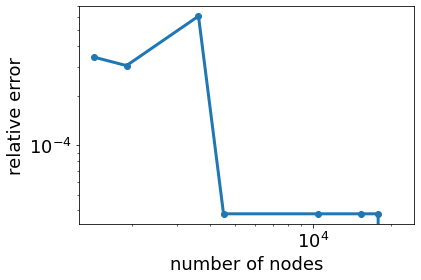

In [4]:
n=np.array([1153,  1438,  1913,  3621,   4521,   10437, 15316,  17801, 21351])
f=np.array([26.252,26.243,26.235,26.219, 26.218, 26.217,26.216, 26.215,26.215])
rel_error= np.abs(f[1:]-f[0:-1])/f[1:]
abs_error= np.abs(f-26.8)/26.8
plt.loglog(n[1:],rel_error,'o-')
plt.xlabel('number of nodes')
plt.ylabel('relative error')

Text(0, 0.5, 'absolute error')

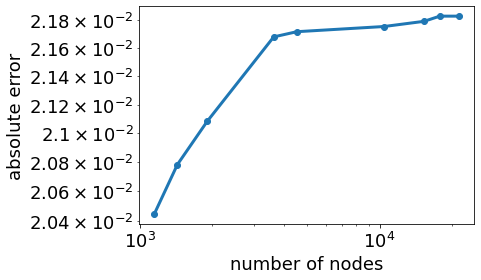

In [5]:
plt.loglog(n,abs_error,'o-')
plt.xlabel('number of nodes')
plt.ylabel('absolute error')

After 4,000 nodes, the first natural frequency mode has converged (the relative error is stable and the absolute error has diminishing returns). The absolute error compares the analytical model to the FEA model. There is a stable 2.2 % error in the frequencies predicted from Euler-Lagrange beam theory and 3D FEA. 

### FEA model accuracy

You can check the accuracy of your model in 3 ways: 

1. Check convergence of your results (convergence)

2. Compare FEA results to analytical model (verification)
 
3. Compare FEA results to experimental results (validation)

Method 1 proves that your results are repeatable. Method 2 is a verification of
your model. Verification of a model proves that with different methods, the
assumptions in your model will converge to the same solution. Method 3 is a
validation of your model. Validation uses measured results to confirm your model
is correct. For many engineering structures, method 2 is not feasible. Instead,
we check convergence with method 1 and validate the model with experimental
results. Here, we are using natural frequencies as our comparison metric. 



# References

1. Fish, J. and Belytschko, T. A First Course in Finite Elements. Wiley 2007.

2. [Ansys help topic: Modal Analysis](./Ansys_Modal-Analysis.pdf)

3.  Engineering Vibration, D. J. Inman, Ch. 4 Multiple-Degree-of-Freedom Systems. Prentice Hall.